### Displaying the Images

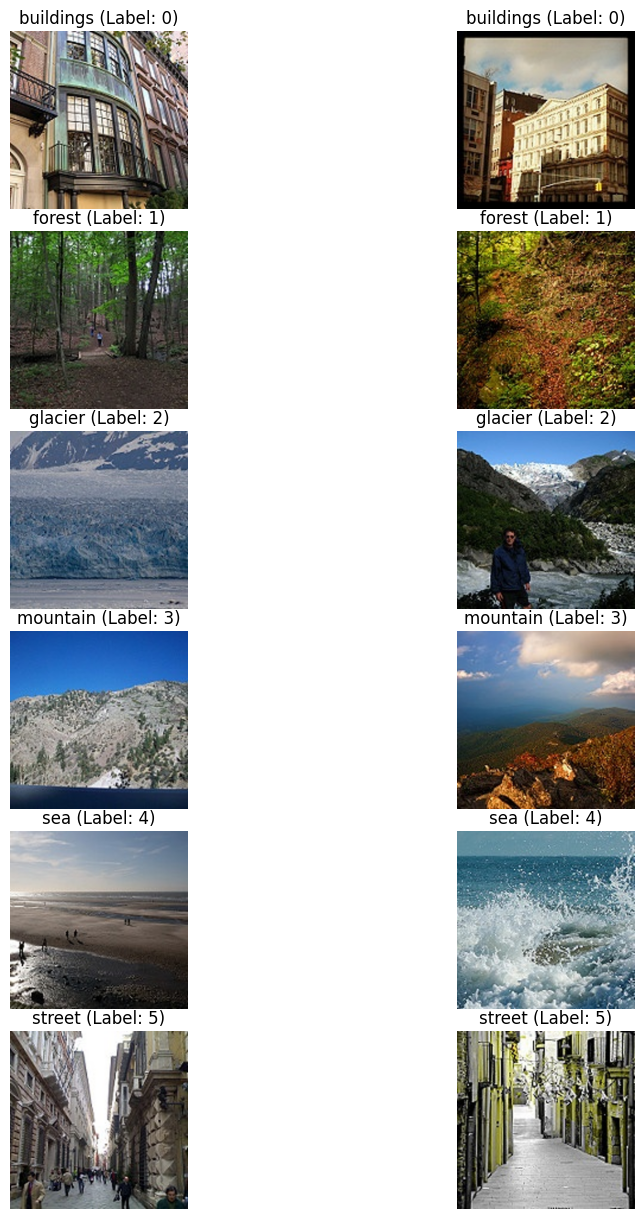

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

# Set the paths to your train, test, and prediction directories
train_dir = r"E:\5TH_SEM\NNDL\seg_train\seg_train"
test_dir = r"E:\5TH_SEM\NNDL\seg_test"
pred_dir = r"E:\5TH_SEM\NNDL\seg_pred"

# Categories in the dataset
categories = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# Function to visualize samples with resizing and optimized layout
def display_samples(dataset_dir, categories, num_samples=2, img_size=(300, 300)):  # Larger image size
    fig, axes = plt.subplots(len(categories), num_samples, figsize=(12, 12))  # Larger figure size
    plt.subplots_adjust(wspace=0.05, hspace=0.05)  # Reduce space between images
    
    for i, category in enumerate(categories):
        folder = os.path.join(dataset_dir, category)
        
        # Ensure the category folder exists
        if not os.path.exists(folder):
            print(f"Directory not found: {folder}")
            continue
        
        # Randomly select images from each category
        img_files = os.listdir(folder)
        if len(img_files) == 0:
            print(f"No images found in directory: {folder}")
            continue
        
        for j in range(num_samples):
            img_name = random.choice(img_files)
            img_path = os.path.join(folder, img_name)
            
            try:
                img = Image.open(img_path)
                img = img.resize(img_size)  # Resize the image to the specified size
                axes[i, j].imshow(img)
                axes[i, j].set_title(f"{category} (Label: {i})", fontsize=12)
                axes[i, j].axis('off')  # Remove axes for cleaner view
            except FileNotFoundError:
                print(f"File not found: {img_path}")
    
    plt.tight_layout(pad=0)  # Remove padding around the figure
    plt.show()

# Display samples from the training data
display_samples(train_dir, categories)


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Create CNN Model
def create_high_performance_cnn(input_shape=(150, 150, 3), num_classes=6):
    model = Sequential()

    # 1st Convolutional Block
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'))
    model.add(BatchNormalization())  # Batch Normalization
    model.add(MaxPooling2D(pool_size=(2, 2)))  # Max Pooling

    # 2nd Convolutional Block
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 3rd Convolutional Block
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size=(2, 2)))  # Average Pooling

    # Flattening the output from Convolutional layers
    model.add(Flatten())

    # Fully Connected Layer (Dense Layer)
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))  # Dropout to prevent overfitting
    model.add(BatchNormalization())

    # Output Layer (Softmax for multi-class classification)
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Compile the model
cnn_model = create_high_performance_cnn(input_shape=(150, 150, 3), num_classes=6)
cnn_model.compile(optimizer=Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

# Model summary to check the architecture
cnn_model.summary()


c:\Users\Pratham.m\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 18, 18, 128)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    10,617,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,713,798 (40.87 MB)

 Trainable params: 10,712,838 (40.87 MB)

 Non-trainable params: 960 (3.75 KB)

### Model Interpretation

#### First Convolution Layer (32 filters):
- Extracts basic features from the input image.
- **Output shape**: (150, 150, 32)

#### Batch Normalization:
- Normalizes the data to improve learning.

#### Max Pooling:
- Reduces the size to (75, 75, 32) by downsampling.

---

#### Second Convolution Layer (64 filters):
- Extracts more detailed features.
- **Output shape**: (75, 75, 64)

#### Batch Normalization:
- Normalizes data again.

#### Max Pooling:
- Reduces the size to (37, 37, 64) for further downsampling.

---

#### Third Convolution Layer (128 filters):
- Extracts even deeper features.
- **Output shape**: (37, 37, 128)

#### Batch Normalization:
- Normalizes data once again.

#### Average Pooling:
- Reduces the size to (18, 18, 128) for smoother features.

---

#### Flatten Layer:
- Converts the 3D data into 1D (41,472 units) for the fully connected layers.

#### Dense Layer (256 units):
- Fully connected layer for learning higher-level patterns.

#### Dropout:
- Helps prevent overfitting.

#### Batch Normalization:
- Normalizes output from the dense layer.

---

#### Final Dense Layer (6 units):
- Output layer for classifying into 6 categories.

---

### Key Points:
- **Total Parameters**: 10.7 million, mostly in the Dense layers.
- **Purpose**: Multi-class classification with 6 classes.
- **Uses Batch Normalization** to improve learning and **Dropout** to avoid overfitting.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

model = Sequential()

# 1st Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# 2nd Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# 3rd Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax')) 


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Model Training:

In [12]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Data Augmentation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 80/20 split

train_generator = train_datagen.flow_from_directory(
    'dataset/seg_train/seg_train/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    'dataset/seg_train/seg_train/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

# Compile model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Epoch 1/20


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


351/351 ━━━━━━━━━━━━━━━━━━━━ 315s 884ms/step - accuracy: 0.4831 - loss: 5.0357 - val_accuracy: 0.3531 - val_loss: 6.9323
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 249s 709ms/step - accuracy: 0.5745 - loss: 1.4792 - val_accuracy: 0.6455 - val_loss: 1.2076
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 234s 666ms/step - accuracy: 0.6516 - loss: 0.9739 - val_accuracy: 0.6740 - val_loss: 1.1260
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 253s 721ms/step - accuracy: 0.7071 - loss: 0.8253 - val_accuracy: 0.7496 - val_loss: 0.7145
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 245s 696ms/step - accuracy: 0.7432 - loss: 0.7367 - val_accuracy: 0.7568 - val_loss: 0.8130
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 284s 810ms/step - accuracy: 0.7556 - loss: 0.6726 - val_accuracy: 0.7739 - val_loss: 0.7900
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 263s 748ms/step - accuracy: 0.7719 - loss: 0.6267 - val_accuracy: 0.7846 - val_loss: 0.6722
Epoch 8/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 244s 694ms/step - accuracy: 0.7963 - loss: 0.56

### Evaluation:

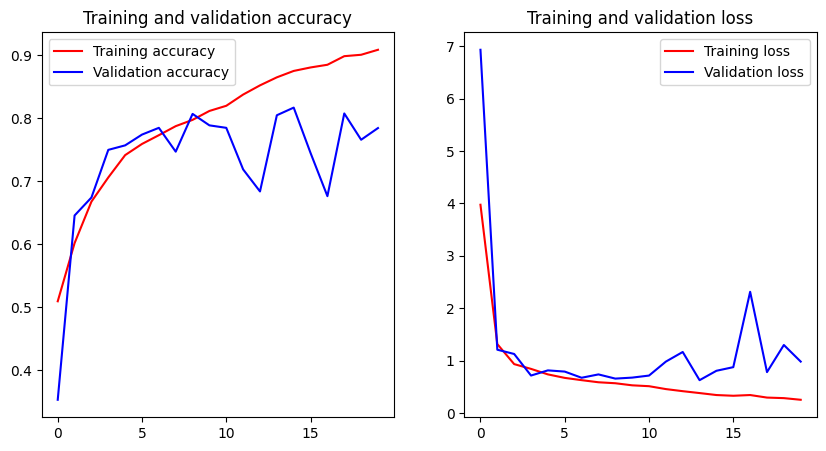

In [13]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    plt.figure(figsize=(10,5))
 
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    

    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()

plot_history(history)


Training Accuracy: Improves steadily, reaching around 90%, showing that the model is learning well from the training data.

Validation Accuracy: Fluctuates a lot, indicating the model might be overfitting to the training data.

Training Loss: Decreases smoothly, meaning the model is reducing its error on the training set.

Validation Loss: Spikes up and down, showing inconsistency in the model’s performance on unseen data.

88/88 ━━━━━━━━━━━━━━━━━━━━ 13s 147ms/step


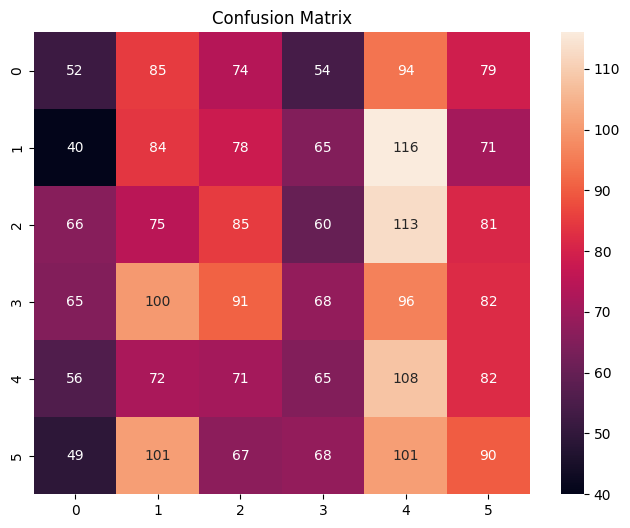

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np


Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)


cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()


Diagonal Values: These represent correct predictions. For example, class 0 was correctly predicted 52 times, class 1 was correctly predicted 84 times, and so on.

Off-Diagonal Values: These represent misclassifications. For instance:

Class 0 was often misclassified as Class 1 (85 times).
Class 5 was misclassified as Class 1 the most (101 times).
Overall Accuracy: The higher the diagonal values, the better the accuracy for those classes. Classes with high off-diagonal values are being misclassified more often.

Performance Issues: There are significant misclassifications, particularly between certain pairs of classes like class 1 and class 5.

### Optimization

In [4]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'dataset/seg_train/seg_train/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    'dataset/seg_train/seg_train/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

# Compile model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Epoch 1/20


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


351/351 ━━━━━━━━━━━━━━━━━━━━ 315s 885ms/step - accuracy: 0.3856 - loss: 5.5625 - val_accuracy: 0.3566 - val_loss: 3.0143
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 246s 699ms/step - accuracy: 0.4612 - loss: 1.4952 - val_accuracy: 0.5357 - val_loss: 1.2523
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 254s 720ms/step - accuracy: 0.5257 - loss: 1.2428 - val_accuracy: 0.4722 - val_loss: 1.6088
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 270s 768ms/step - accuracy: 0.5670 - loss: 1.1505 - val_accuracy: 0.6205 - val_loss: 0.9796
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 254s 722ms/step - accuracy: 0.6081 - loss: 1.0669 - val_accuracy: 0.5068 - val_loss: 1.2464
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 254s 721ms/step - accuracy: 0.6156 - loss: 1.0243 - val_accuracy: 0.4900 - val_loss: 1.5121
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 269s 763ms/step - accuracy: 0.6279 - loss: 1.0115 - val_accuracy: 0.5849 - val_loss: 1.0594
Epoch 8/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 263s 746ms/step - accuracy: 0.6491 - loss: 0.94

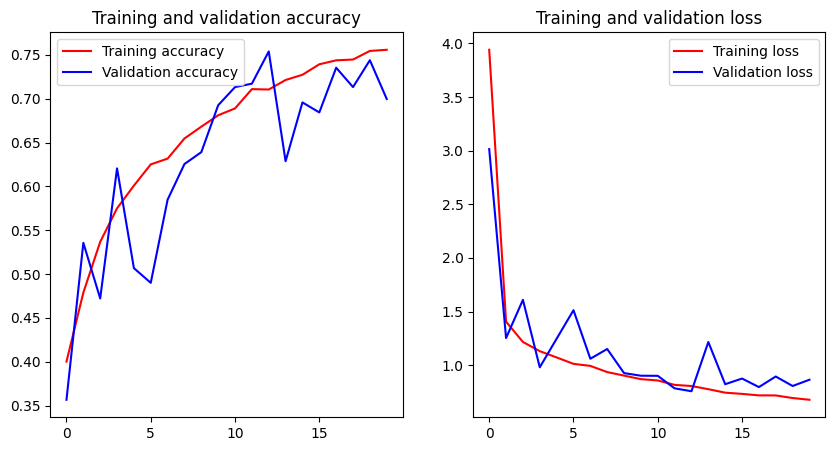

In [5]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    plt.figure(figsize=(10,5))
 
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    

    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()

plot_history(history)


Training Accuracy: Steadily improves to around 0.75.

Validation Accuracy: Fluctuates but generally improves alongside training accuracy.

Training Loss: Decreases consistently, meaning the model is learning well.

Validation Loss: Decreases with some fluctuations, but mostly follows the training loss.

88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 216ms/step


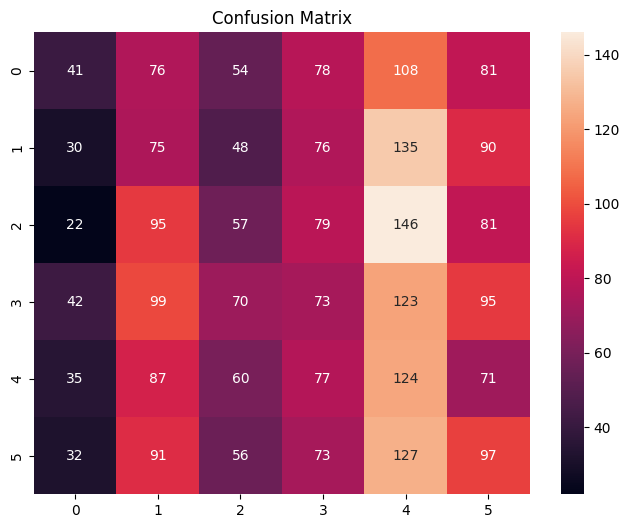

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np


Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)


cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()


Diagonal Values: These represent correct predictions (true positives). For example, class 0 was correctly predicted 41 times, class 1 was correctly predicted 75 times, and so on.

Off-Diagonal Values: These represent misclassifications. For instance:

Class 0 is frequently misclassified as class 4 (108 times).
Class 5 is often misclassified as class 4 (127 times).
Class Confusion:

Class 4: Seems to be a confusing class for the model, with many misclassifications both to and from class 4.
Class 2 and 3: Also have high misclassifications into other classes, such as class 1, indicating confusion between these classes.